# 预训练MobileNet图像分类

>同济大学 张子豪 2021-09-23<br>

视频教程：同济子豪兄 https://space.bilibili.com/1900783

# 导入工具库

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [6]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [4]:
import numpy as np

# 导入数据可视化工具包
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

# 导入预训练模型，以下三个模型选一个运行即可

## 导入MobileNet V1预训练模型

In [8]:
# # 导入MobileNet V1
# from tensorflow.keras.applications import MobileNet
# from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

# model = MobileNet(alpha=1.0,                      # MobileNet论文中的宽度超参数
#                 depth_multiplier=1,               # MobileNet论文中的分辨率超参数
#                 include_top=True,                 # 是否包含最后的全连接分类层
#                 weights="imagenet",               # 权重默认为ImageNet一千类图像分类
#                 classes=1000                      # 1000个类别
# )

keras会自动从`https://github.com/fchollet/deep-learning-models/releases/download/v0.6/mobilenet_1_0_224_tf.h5`下载模型权重文件，该模型文件已放在weights文件夹中，若下载出问题，可手动复制粘贴模型权重文件`mobilenet_1_0_224_tf.h5`到keras安装目录的models文件夹中。

## 导入MobileNet V2预训练模型

In [6]:
# 导入MobileNet V2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

model = MobileNetV2(alpha=1.0,                      # MobileNet论文中的宽度超参数
                include_top=True,                 # 是否包含最后的全连接分类层
                weights="imagenet",               # 权重默认为ImageNet一千类图像分类
                classes=1000                      # 1000个类别
)

keras会自动从`https://github.com/JonathanCMitchell/mobilenet_v2_keras/releases/download/v1.1/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224.h5`下载模型权重文件，该模型文件已放在weights文件夹中，若下载出问题，可手动复制粘贴模型权重文件`mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224.h5`到keras安装目录的models文件夹中。

## 导入ResNet50预训练模型

In [7]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
# model = ResNet50(include_top=True,weights="imagenet",classes=1000)

keras会自动从`https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels.h5`下载模型权重文件，该模型文件已放在weights文件夹中，若下载出问题，可手动复制粘贴模型权重文件`resnet50_weights_tf_dim_ordering_tf_kernels.h5`到keras安装目录的models文件夹中。

# 探索模型结构

In [41]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

# 可视化模型结构（需安装GraphViz），可不运行

In [ ]:
# # # 可视化模型
# # # pip install pydot-ng & brew install graphviz

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file="img/1229-01.png", show_shapes=True)

# 载入图像

In [20]:
img_path = 'img/strawberry.jpg'

In [21]:
# 导入图像预处理
from tensorflow.keras.preprocessing import image

img = image.load_img(img_path, target_size=(224, 224))

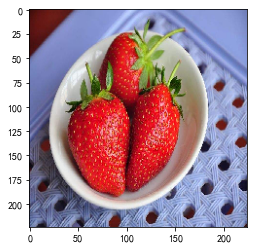

In [48]:
plt.imshow(img)
plt.show()

# 预处理

In [23]:
x = image.img_to_array(img)

In [24]:
x.shape

(224, 224, 3)

In [28]:
x = np.expand_dims(x, axis=0)

In [29]:
x.shape

(1, 224, 224, 3)

In [30]:
x = preprocess_input(x)

In [31]:
x

array([[[[-0.58431375, -0.90588236, -0.9529412 ],
         [-0.54509807, -0.8980392 , -0.9372549 ],
         [-0.5137255 , -0.8980392 , -0.92941177],
         ...,
         [-0.10588235,  0.0196079 ,  0.427451  ],
         [-0.12156862,  0.00392163,  0.41176474],
         [-0.15294117, -0.03529412,  0.427451  ]],

        [[-0.5529412 , -0.8901961 , -0.9372549 ],
         [-0.52156866, -0.8980392 , -0.92941177],
         [-0.4980392 , -0.88235295, -0.9137255 ],
         ...,
         [-0.10588235,  0.01176476,  0.4431373 ],
         [-0.12156862, -0.00392157,  0.427451  ],
         [-0.14509803, -0.02745098,  0.43529415]],

        [[-0.5372549 , -0.8901961 , -0.92941177],
         [-0.5058824 , -0.8901961 , -0.92156863],
         [-0.4823529 , -0.88235295, -0.90588236],
         ...,
         [-0.10588235,  0.01176476,  0.45882356],
         [-0.12156862, -0.00392157,  0.4431373 ],
         [-0.1372549 , -0.01960784,  0.4431373 ]],

        ...,

        [[-0.02745098,  0.09803927,  0

# 运行图像分类，解析预测结果

In [32]:
preds = model.predict(x)

In [34]:
preds.shape

(1, 1000)

In [36]:
preds

array([[4.76994319e-06, 7.21286096e-06, 3.99804458e-06, 1.82556403e-06,
        7.97783173e-07, 3.99989449e-06, 1.63923028e-06, 2.85311471e-05,
        3.02408557e-06, 1.69469274e-06, 1.57042723e-06, 2.90090793e-06,
        1.09057291e-05, 3.33183743e-06, 3.02703711e-06, 3.84682198e-06,
        2.65643826e-06, 1.28074578e-06, 3.83194731e-07, 5.19296009e-06,
        1.17047432e-06, 7.65704954e-06, 3.93369692e-06, 1.33495030e-06,
        2.67270912e-06, 1.16784736e-06, 7.99734039e-07, 6.82228210e-06,
        1.33492983e-06, 3.60715785e-06, 4.26808219e-06, 7.20189109e-06,
        1.64183052e-06, 7.50864388e-07, 7.97926191e-07, 1.04323487e-06,
        6.60169860e-07, 1.37970949e-06, 1.15853811e-06, 3.73872826e-05,
        1.27884368e-05, 3.92588254e-06, 2.07115977e-06, 3.91004414e-06,
        5.20560388e-06, 6.78967899e-06, 7.49282481e-06, 6.10060226e-07,
        3.45002923e-06, 4.30554610e-06, 2.78433231e-06, 1.20470340e-05,
        1.04505061e-05, 2.26416864e-06, 5.82843813e-06, 5.323083

In [7]:
np.sum(preds)

0.9999999

In [38]:
decode_predictions(preds, top=5)

[[('n07745940', 'strawberry', 0.9805587),
  ('n07614500', 'ice_cream', 0.0066338205),
  ('n07613480', 'trifle', 0.0026490907),
  ('n07836838', 'chocolate_sauce', 0.0012040476),
  ('n04332243', 'strainer', 0.0006303237)]]

输出结果为：WordNet编码、英文类别名称、置信度概率

In [46]:
max_prob = max(preds[0].tolist())
max_prob_index = preds[0].tolist().index(max_prob)
print('最大的置信度概率为',max_prob)
print('最大置信度概率对应的索引号为',max_prob_index)
print('最大置信度概率对应的类别为',decode_predictions(preds, top=5)[0][0][1])

最大的置信度概率为为 0.9805586934089661
最大置信度概率对应的索引为 949
最大置信度概率对应的类别为 strawberry


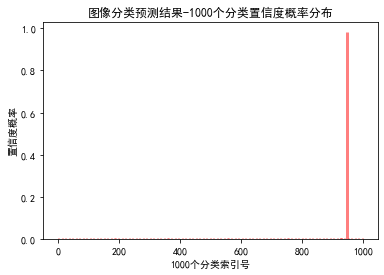

In [47]:
x = np.arange(1000)
y = preds[0]
plt.bar(x, y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', lw=3)
plt.title('图像分类预测结果-1000个分类置信度概率分布')
plt.xlabel('1000个分类索引号')
plt.ylabel('置信度概率')
plt.show()

# 在原图可视化展示图像分类预测结果

In [129]:
# 导入opencv-python
import cv2

In [130]:
# 载入原始图像
img = cv2.imread(img_path)

In [131]:
img.shape

(598, 900, 3)

In [132]:
results = decode_predictions(preds, top=5)

In [133]:
results[0]

[('n07745940', 'strawberry', 0.998073),
 ('n04263257', 'soup_bowl', 0.00058418716),
 ('n04332243', 'strainer', 0.00047664778),
 ('n07753275', 'pineapple', 0.00025380615),
 ('n07930864', 'cup', 0.00013427439)]

In [134]:
# 遍历results变量中的每一个元素，写在原图左上角
for idx, result in enumerate(results[0]): 
    text1 = '{:<10} {:>.4f}'.format(result[1], result[2])
    
    # !图片，添加的文字，左上角坐标，字体，字体大小，颜色，字体粗细
    img = cv2.putText(img, text1, (25, 50 + 40 * idx), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (255, 255, 255), 2)

In [135]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

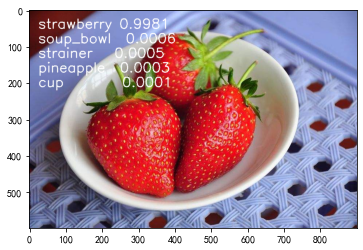

In [136]:
look_img(img)

# 整理上述全部代码

In [1]:
# 导入工具包

import numpy as np

# 载入图像处理、预处理、解码预测结果的辅助函数
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

# 导入MobileNet V1
from tensorflow.keras.applications import MobileNet

# 在原图可视化展示图像分类预测结果

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [2]:
# 载入MobileNet预训练模型，运行图像分类
model = MobileNet(alpha=1.0,                      # MobileNet论文中的宽度超参数
                depth_multiplier=1,               # MobileNet论文中的分辨率超参数
                include_top=True,                 # 是否包含最后的全连接分类层
                weights="imagenet",               # 权重默认为ImageNet一千类图像分类
                classes=1000                      # 1000个类别
)

# # 导入MobileNet V2预训练模型
# from tensorflow.keras.applications import MobileNetV2

# model = MobileNetV2(alpha=1.0,                      # MobileNet论文中的宽度超参数
#                 include_top=True,                 # 是否包含最后的全连接分类层
#                 weights="imagenet",               # 权重默认为ImageNet一千类图像分类
#                 classes=1000                      # 1000个类别
# )

# # 载入ResNet50预训练模型
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
# model = ResNet50(include_top=True,weights="imagenet",classes=1000)

17235968/17225924 [==============================] - 1s 0us/step


In [3]:
# 载入图像并预处理
img_path = 'img/strawberry.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

results = decode_predictions(preds, top=5)

print(results[0])

[('n07745940', 'strawberry', 0.99836737), ('n04263257', 'soup_bowl', 0.0005316641), ('n04332243', 'strainer', 0.00035750418), ('n07753275', 'pineapple', 0.00021938614), ('n07930864', 'cup', 0.000110635825)]


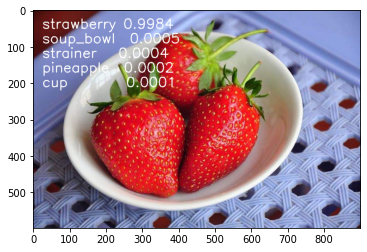

In [4]:
# 导入opencv-python
import cv2
img = cv2.imread(img_path)

# 遍历results变量中的每一个元素，写在原图左上角
for idx, result in enumerate(results[0]): 
    text1 = '{:<10} {:>.4f}'.format(result[1], result[2])
    
    # !图片，添加的文字，左上角坐标，字体，字体大小，颜色，字体粗细
    img = cv2.putText(img, text1, (25, 50 + 40 * idx), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (255, 255, 255), 2)

look_img(img)